## Problem Statement 

#### Prepare a classification model using  Support Vector Machines for salary data.

### Import all the required libraries 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_sd = pd.read_csv("SalaryData_Train.csv")
df_sd.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
LE = preprocessing.LabelEncoder()
obj = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
df_sd[obj] = df_sd[obj].apply(LE.fit_transform)

In [6]:
df_sd.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [7]:
df_sd['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [8]:
df_sd.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [9]:
df_sd.shape

(30161, 14)

In [10]:
df_sd.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df_sd[df_sd.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,2,9,13,2,3,0,4,1,0,0,40,37,1
364,27,2,9,13,4,2,1,4,1,0,0,50,37,0
518,24,2,11,9,4,5,4,2,0,0,0,40,37,0
525,24,2,11,9,4,2,3,4,1,0,0,40,37,0
619,33,2,9,13,2,3,0,4,1,0,0,40,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,2,11,9,2,2,0,4,1,0,0,40,37,0
30118,20,2,11,9,4,6,3,4,1,0,0,40,37,0
30132,22,2,15,10,4,0,3,4,1,0,0,40,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1


In [12]:
df_sd=df_sd.drop_duplicates(ignore_index=True)
df_sd[df_sd.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


## Visualization

<AxesSubplot: xlabel='age', ylabel='maritalstatus'>

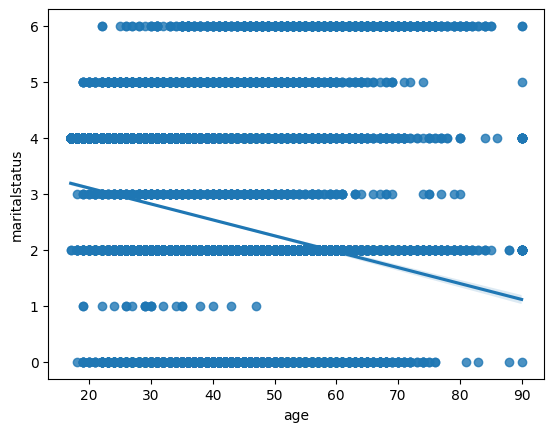

In [15]:
sns.regplot(x='age',y='maritalstatus', data=df_sd)  

<AxesSubplot: >

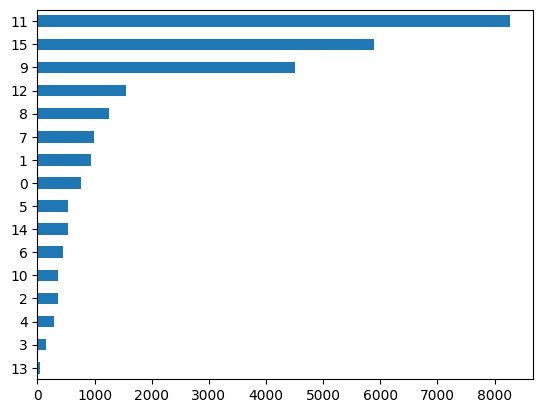

In [16]:
df_sd.education.value_counts(ascending=True).plot(kind='barh')

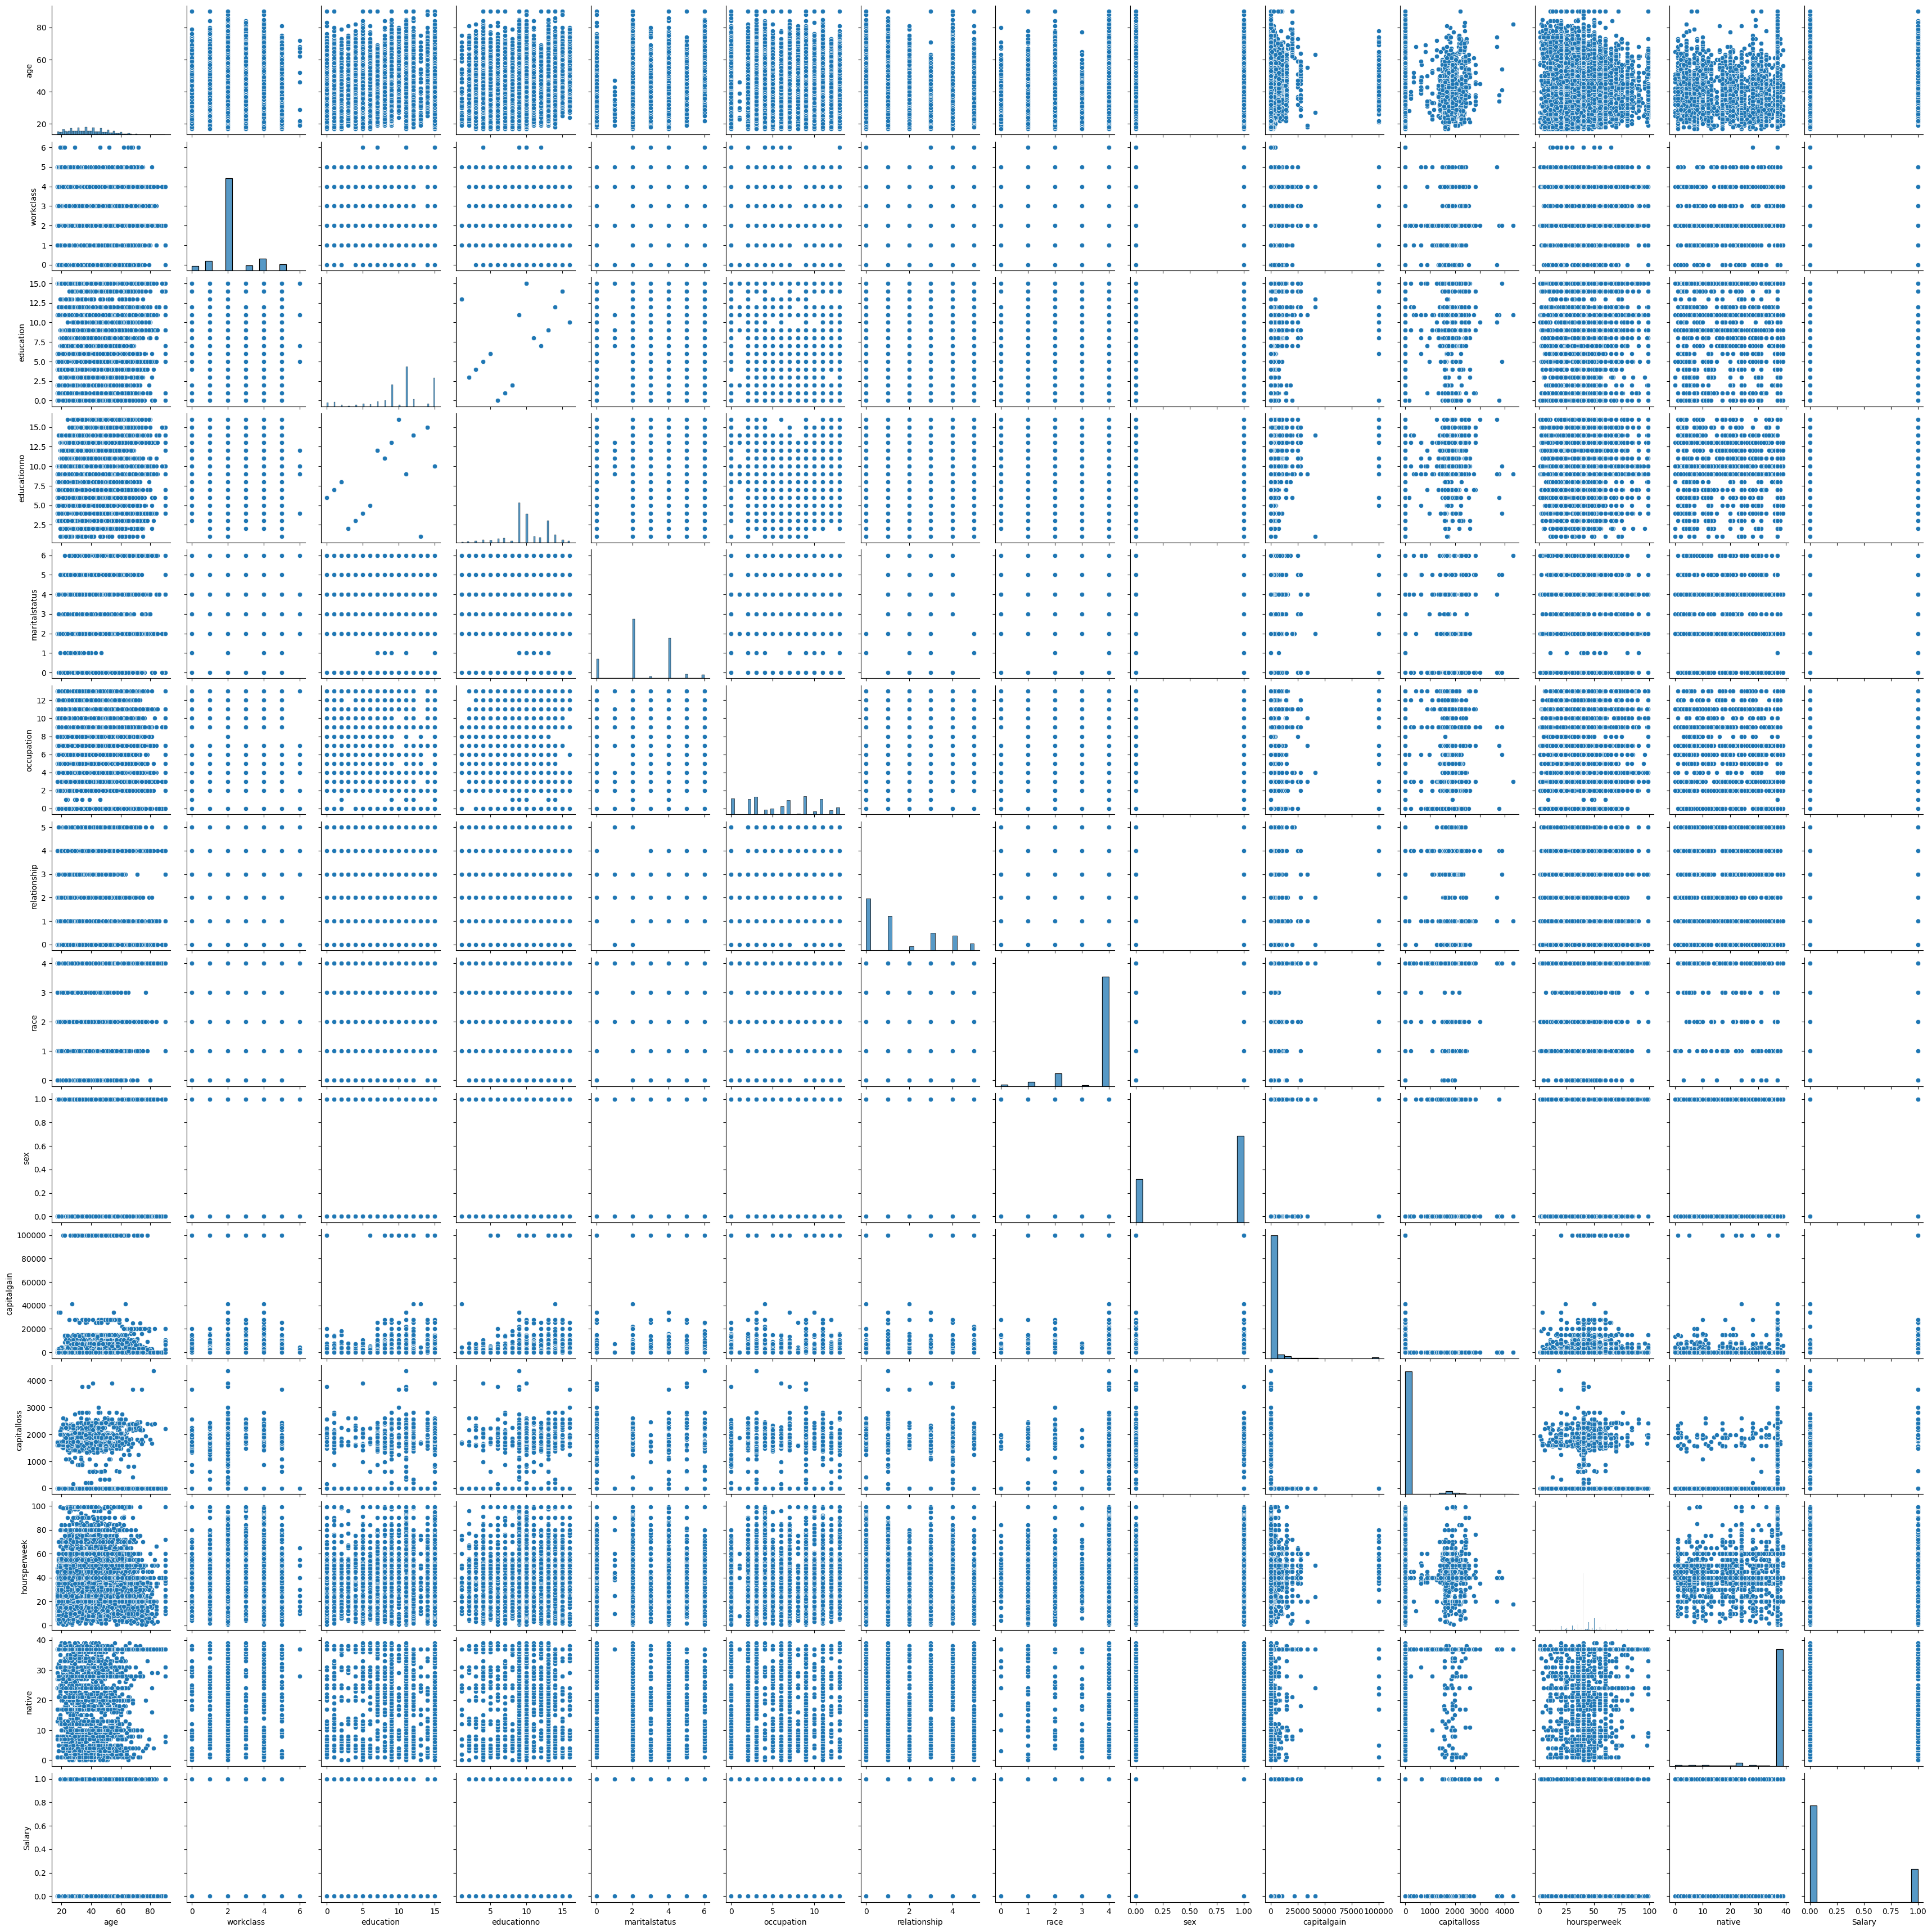

In [17]:
sns.pairplot(df_sd)

<AxesSubplot: xlabel='native', ylabel='Density'>

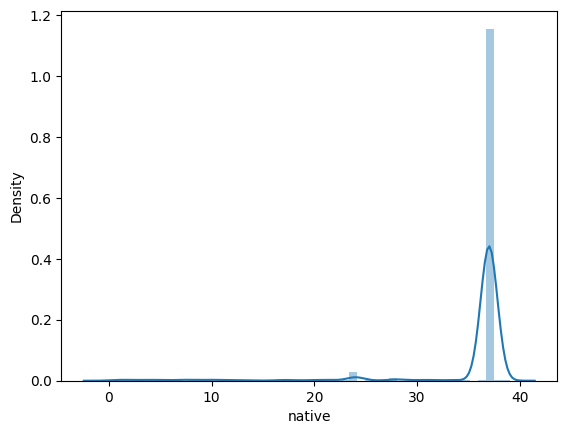

In [18]:
sns.distplot(df_sd['native'])

<AxesSubplot: xlabel='maritalstatus', ylabel='Density'>

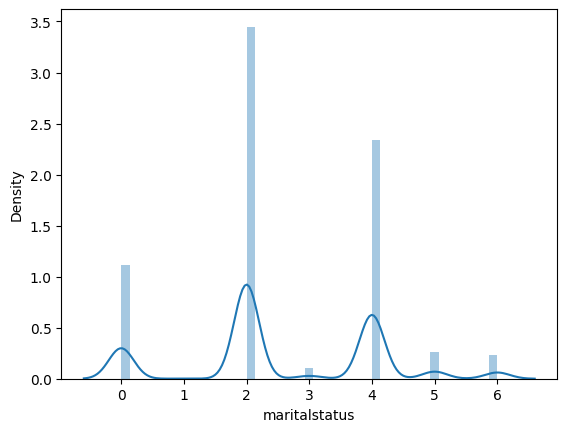

In [19]:
sns.distplot(df_sd['maritalstatus'])

<AxesSubplot: >

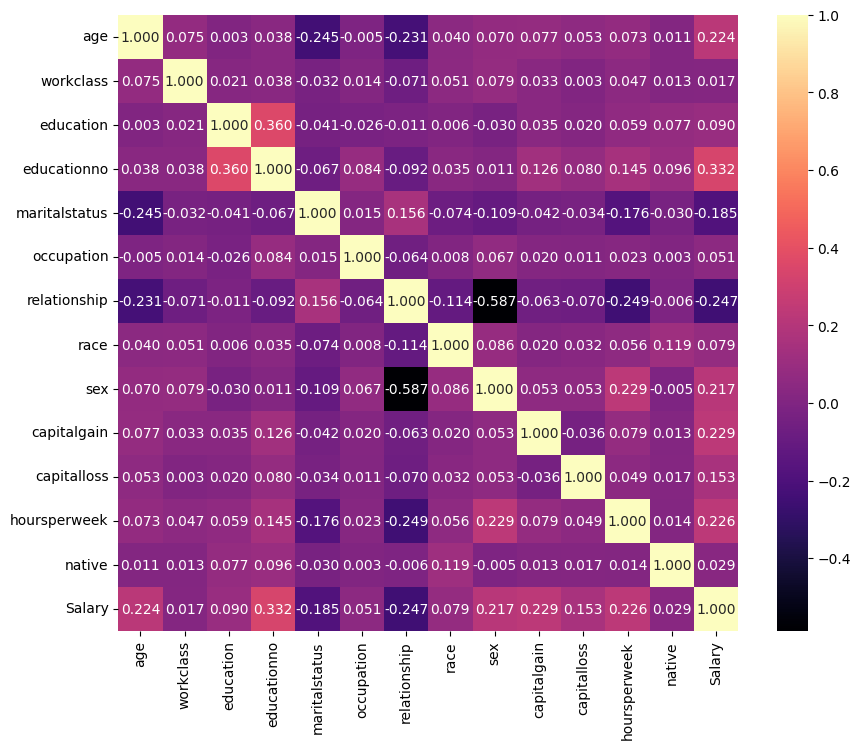

In [20]:
plt.figure(figsize = (10, 8));
sns.heatmap(df_sd.corr(), cmap='magma', annot=True, fmt=".3f")

<AxesSubplot: xlabel='age', ylabel='workclass'>

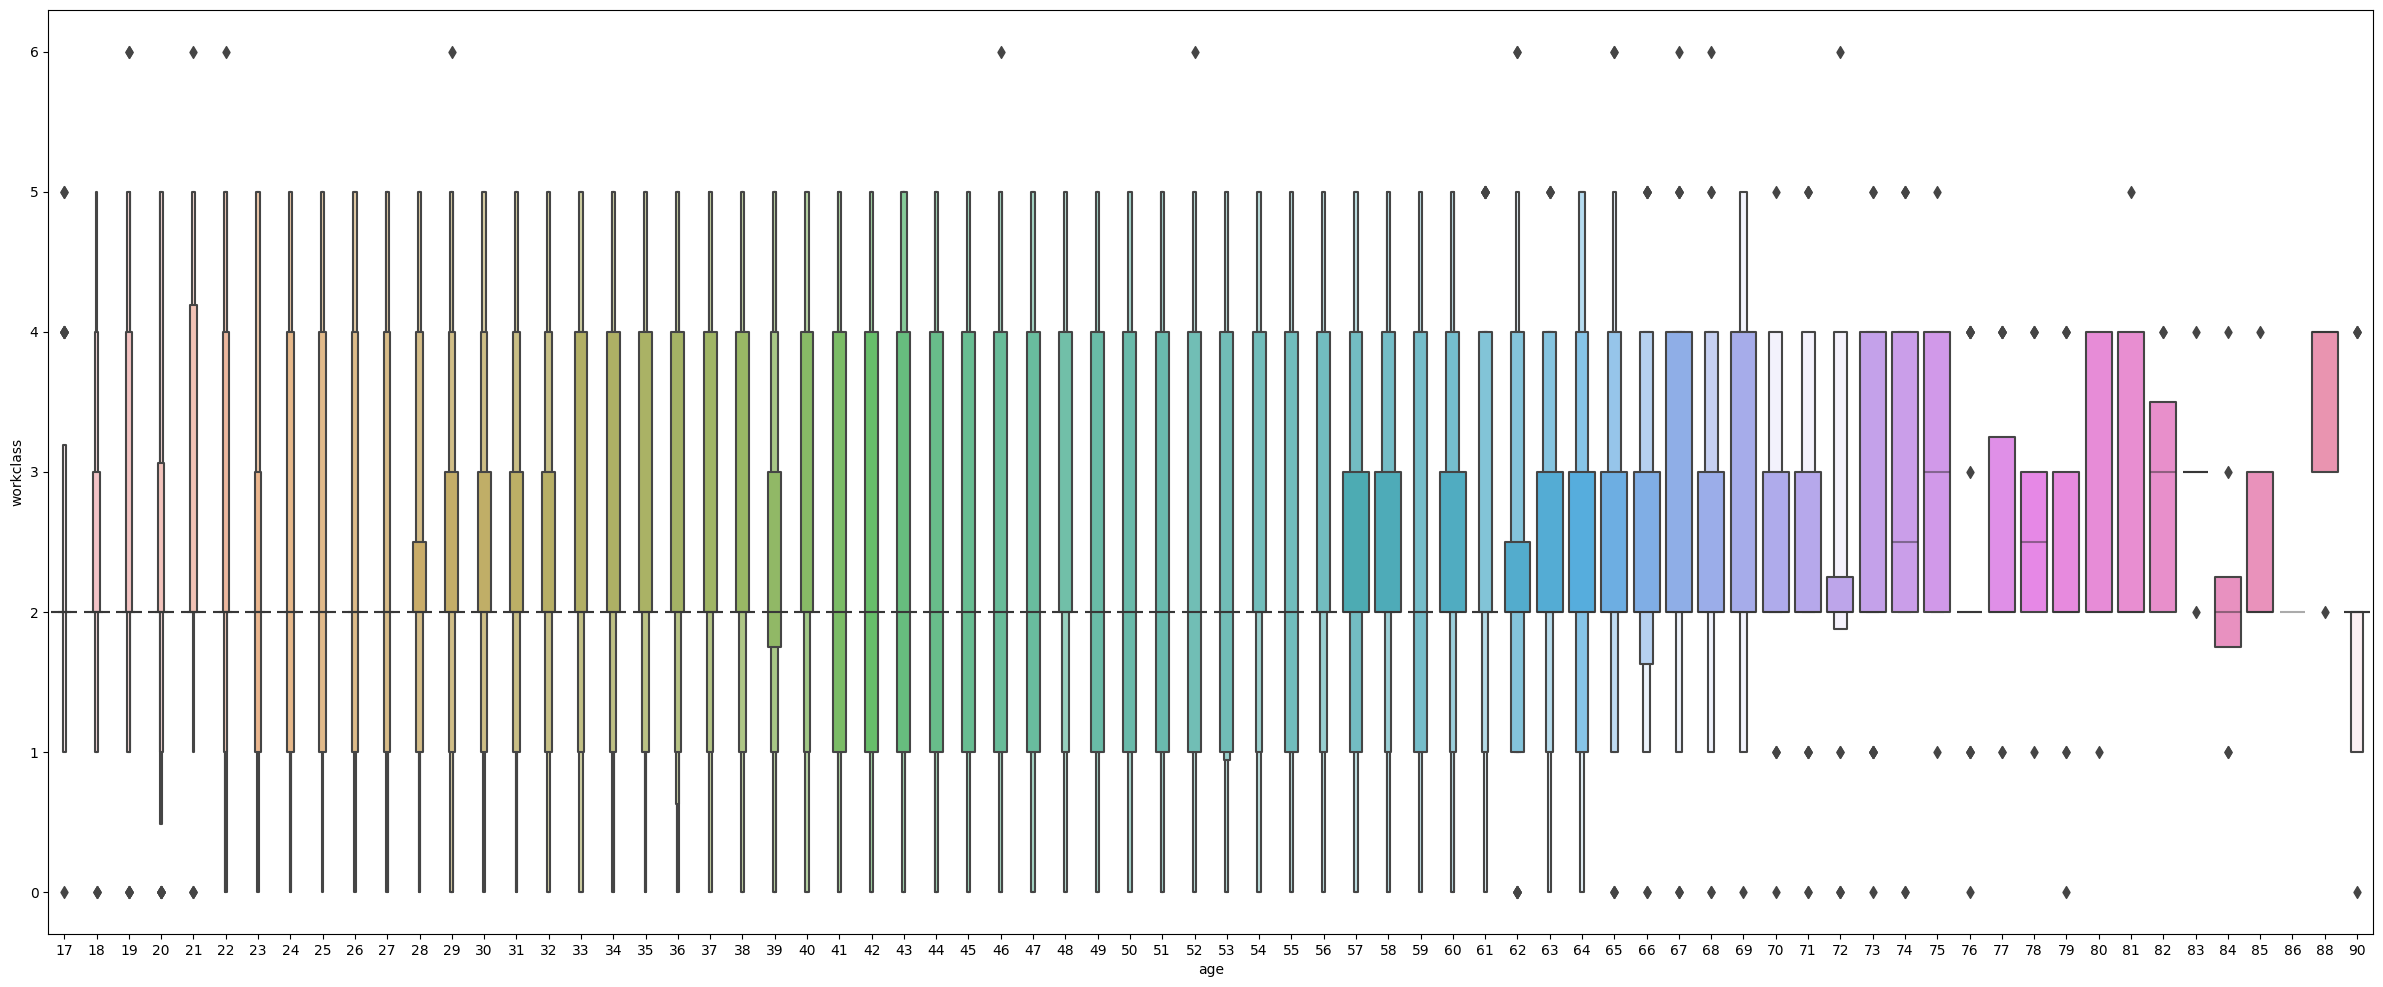

In [21]:
plt.figure(figsize = (30, 12));
sns.boxenplot(x = 'age', y = 'workclass', data = df_sd)

<AxesSubplot: xlabel='education', ylabel='maritalstatus'>

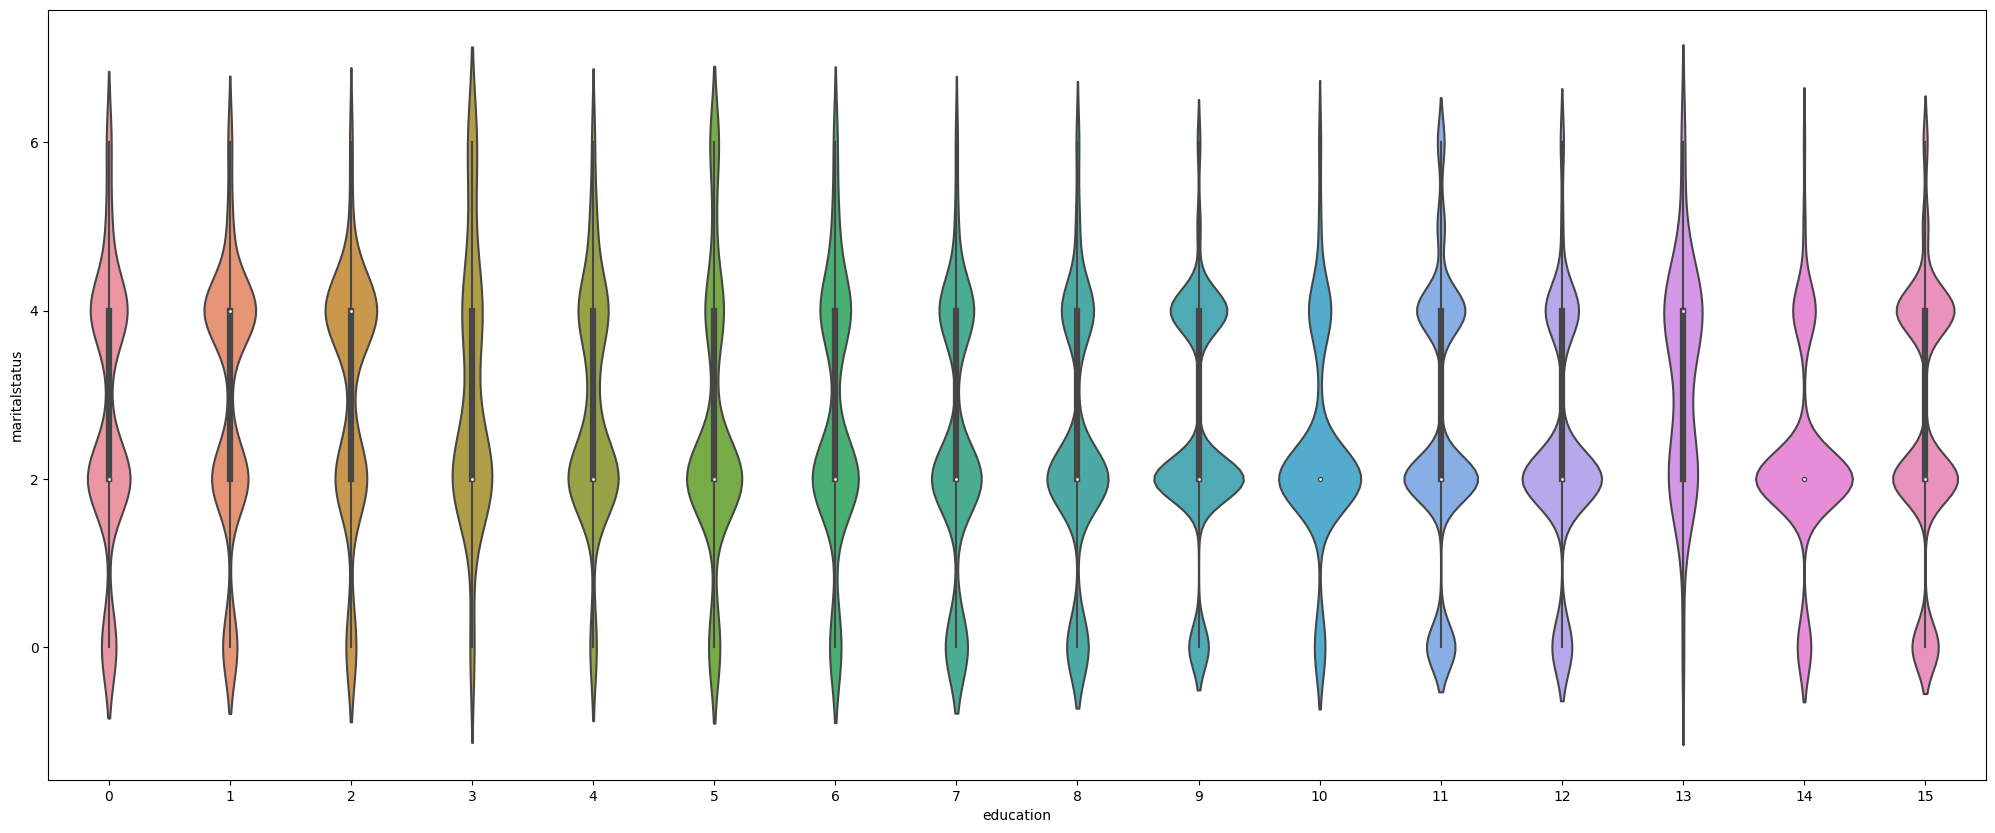

In [22]:
plt.figure(figsize = (25, 10));
sns.violinplot(x ="education",
             y ="maritalstatus",
             style ="event",
             data = df_sd)

In [11]:
x = df_sd.iloc[:,:-1]
y = df_sd.iloc[:,-1]

### Model Building

In [12]:
clf = SVC(C=14, gamma=0.001,kernel='rbf')
clf.fit(x,y)
y_pred=clf.predict(x)
acc = accuracy_score(y,y_pred)*100
print("accuracy=",acc)
print(classification_report(y,y_pred))

accuracy= 85.79291137561752
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     22653
           1       0.85      0.52      0.65      7508

    accuracy                           0.86     30161
   macro avg       0.85      0.75      0.78     30161
weighted avg       0.86      0.86      0.85     30161

